In [30]:
import re
import pandas as pd
from urlextract import URLExtract

In [31]:
f = open('WhatsApp Chat with S.C.A.M.M.Y.txt' , 'r' , encoding='UTF-8')

In [32]:
data = f.read()

In [33]:
print(data)

06/06/2025, 8:31 pm - Chandan Panda: Waiting for this message
06/06/2025, 8:31 pm - Chandan Panda: Waiting for this message
07/06/2025, 7:34 am - You were added
07/06/2025, 7:34 am - Manananas was added
06/06/2025, 8:44 pm - Manananas: 
06/06/2025, 8:44 pm - Manananas: <Media omitted>
06/06/2025, 8:44 pm - Manananas: <Media omitted>
06/06/2025, 8:44 pm - Manananas: <Media omitted>
06/06/2025, 8:45 pm - Chandan Panda: Waiting for this message
06/06/2025, 8:45 pm - Chandan Panda: Waiting for this message
06/06/2025, 8:45 pm - Manananas: Have a break, have a kitkat
06/06/2025, 8:46 pm - Chandan Panda: Waiting for this message
07/06/2025, 1:52 am - Chandan Panda: Waiting for this message
07/06/2025, 7:34 am - Mr Shreyas Shetty Of Vit added ~Mrugendra.N, Anshul bade baal waala, Mr Shreyas Shetty Of Vit and Yash VIT
07/06/2025, 1:22 am - Yash VIT: namaskar kaku 🙏🏻
07/06/2025, 1:26 am - Yash VIT: bhai limbo free tha pc ke liye 😭😭😭😭😭
07/06/2025, 1:26 am - Yash VIT: till 5th of june
07/06/2025,

In [34]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}.?[ap]m\s-\s'

In [35]:
messages = re.split(pattern , data)[1:]
messages

['Chandan Panda: Waiting for this message\n',
 'Chandan Panda: Waiting for this message\n',
 'You were added\n',
 'Manananas was added\n',
 'Manananas: \n',
 'Manananas: <Media omitted>\n',
 'Manananas: <Media omitted>\n',
 'Manananas: <Media omitted>\n',
 'Chandan Panda: Waiting for this message\n',
 'Chandan Panda: Waiting for this message\n',
 'Manananas: Have a break, have a kitkat\n',
 'Chandan Panda: Waiting for this message\n',
 'Chandan Panda: Waiting for this message\n',
 'Mr Shreyas Shetty Of Vit added ~Mrugendra.N, Anshul bade baal waala, Mr Shreyas Shetty Of Vit and Yash VIT\n',
 'Yash VIT: namaskar kaku 🙏🏻\n',
 'Yash VIT: bhai limbo free tha pc ke liye 😭😭😭😭😭\n',
 'Yash VIT: till 5th of june\n',
 'Yash VIT: or muje iski news google pe aaj aa rhi hai T_T_T_T\n',
 'Manananas: Bruh\n',
 'Yash VIT: <Media omitted>\n',
 'Yash VIT: bhai gym me hoes no jutsu chala rhe 😭😭\n',
 'Manananas: https://www.instagram.com/p/DKlkYYRuFme/?igsh=MXFwcTlpa2d4bHNpNQ==\n',
 'Manananas: @\u2068Yas

In [36]:
dates = re.findall(pattern , data)
dates

['06/06/2025, 8:31\u202fpm - ',
 '06/06/2025, 8:31\u202fpm - ',
 '07/06/2025, 7:34\u202fam - ',
 '07/06/2025, 7:34\u202fam - ',
 '06/06/2025, 8:44\u202fpm - ',
 '06/06/2025, 8:44\u202fpm - ',
 '06/06/2025, 8:44\u202fpm - ',
 '06/06/2025, 8:44\u202fpm - ',
 '06/06/2025, 8:45\u202fpm - ',
 '06/06/2025, 8:45\u202fpm - ',
 '06/06/2025, 8:45\u202fpm - ',
 '06/06/2025, 8:46\u202fpm - ',
 '07/06/2025, 1:52\u202fam - ',
 '07/06/2025, 7:34\u202fam - ',
 '07/06/2025, 1:22\u202fam - ',
 '07/06/2025, 1:26\u202fam - ',
 '07/06/2025, 1:26\u202fam - ',
 '07/06/2025, 1:27\u202fam - ',
 '07/06/2025, 6:49\u202fam - ',
 '07/06/2025, 11:38\u202fam - ',
 '07/06/2025, 11:38\u202fam - ',
 '07/06/2025, 3:20\u202fpm - ',
 '07/06/2025, 3:20\u202fpm - ',
 '07/06/2025, 8:14\u202fpm - ',
 '07/06/2025, 8:15\u202fpm - ',
 '07/06/2025, 8:15\u202fpm - ',
 '07/06/2025, 8:15\u202fpm - ',
 '07/06/2025, 8:15\u202fpm - ',
 '07/06/2025, 8:15\u202fpm - ',
 '07/06/2025, 8:15\u202fpm - ',
 '07/06/2025, 8:15\u202fpm - ',
 '07/0

In [37]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

# Correcting the date format:
# %I is for 12-hour clock, %p for AM/PM, and \u202f handles the narrow space in the source text.
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %I:%M\u202f%p - ')
df.rename(columns={'message_date': 'date'}, inplace=True)

df.head()

,user_message,date
0,Chandan Panda: Waiting for this message\n,2025-06-06 20:31:00
1,Chandan Panda: Waiting for this message\n,2025-06-06 20:31:00
2,You were added\n,2025-06-07 07:34:00
3,Manananas was added\n,2025-06-07 07:34:00
4,Manananas: \n,2025-06-06 20:44:00


In [38]:
df.shape

(32279, 2)

In [39]:
# Separate User and Message
users = []
msgs = []
for message in df['user_message']:
    entry = re.split(r'([\w\W]+?):\s', message)
    if len(entry) > 2:
        users.append(entry[1])
        msgs.append(entry[2].strip())
    else:
        users.append('group_notification')
        msgs.append(entry[0].strip())

df['user'] = users
df['message'] = msgs
df.drop(columns=['user_message'], inplace=True)

display(df.head())

,date,user,message
0,2025-06-06 20:31:00,Chandan Panda,Waiting for this message
1,2025-06-06 20:31:00,Chandan Panda,Waiting for this message
2,2025-06-07 07:34:00,group_notification,You were added
3,2025-06-07 07:34:00,group_notification,Manananas was added
4,2025-06-06 20:44:00,Manananas,


In [40]:
df['year'] =df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df.head()

,date,user,message,year,month,day,hour,minute
0,2025-06-06 20:31:00,Chandan Panda,Waiting for this message,2025,June,6,20,31
1,2025-06-06 20:31:00,Chandan Panda,Waiting for this message,2025,June,6,20,31
2,2025-06-07 07:34:00,group_notification,You were added,2025,June,7,7,34
3,2025-06-07 07:34:00,group_notification,Manananas was added,2025,June,7,7,34
4,2025-06-06 20:44:00,Manananas,,2025,June,6,20,44


In [67]:
# Derived time columns needed later (timeline + daily timeline + heatmap)
df['month_num'] = df['date'].dt.month
df['only_date'] = df['date'].dt.date
df['day_name'] = df['date'].dt.day_name()

# Period column for heatmap (hour-hour+1)
period = []
for hour in df['hour']:
    if hour == 23:
        period.append('23-00')
    elif hour == 0:
        period.append('00-1')
    else:
        period.append(f"{hour}-{hour + 1}")

df['period'] = period

df[['date', 'month_num', 'only_date', 'day_name', 'period']].head()

,date,month_num,only_date,day_name,period
0,2025-06-06 20:31:00,6,2025-06-06,Friday,20-21
1,2025-06-06 20:31:00,6,2025-06-06,Friday,20-21
2,2025-06-07 07:34:00,6,2025-06-07,Saturday,7-8
3,2025-06-07 07:34:00,6,2025-06-07,Saturday,7-8
4,2025-06-06 20:44:00,6,2025-06-06,Friday,20-21


In [42]:
# Count words in each message
words = []
for msg in df['message']:
    words.extend(msg.lower().split())

In [43]:
len(words)

150755

In [44]:
extract = URLExtract()

In [45]:
links = []
for msg in df['message']:
    links.extend(extract.find_urls(msg))

In [46]:
len(links)

287

In [47]:
df['user'].value_counts()

user
Yash VIT                    9772
Anshul bade baal waala      6226
Chandan Panda               6154
Manananas                   4948
~Mrugendra.N                3189
Mr Shreyas Shetty Of Vit    1973
group_notification            10
Meta AI                        7
Name: count, dtype: int64

In [48]:
import matplotlib.pyplot as plt

In [49]:
name = df['user'].value_counts().index
count = df['user'].value_counts().values

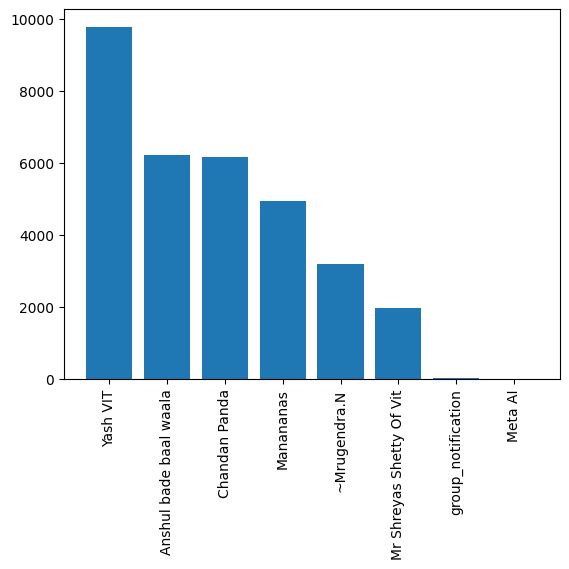

In [50]:
plt.bar(name, count)
plt.xticks(rotation='vertical')
plt.show()

In [51]:
# Calculate percentage
new_df = df[df['user'] != 'group_notification']
percent = round((new_df['user'].value_counts() / new_df.shape[0])*100, 2).reset_index().rename(columns={'index':'name', 'user':'percent'})
percent

,percent,count
0,Yash VIT,30.28
1,Anshul bade baal waala,19.29
2,Chandan Panda,19.07
3,Manananas,15.33
4,~Mrugendra.N,9.88
5,Mr Shreyas Shetty Of Vit,6.11
6,Meta AI,0.02


In [52]:
# Word analysis with stopwords
temp = df[df['user'] != 'group_notification']
words_list = []
for msg in temp['message']:
    for word in msg.lower().split():
        words_list.append(word)

In [53]:
from collections import Counter
freq_df = pd.DataFrame(Counter(words_list).most_common(20))
freq_df

,0,1
0,i,3499
1,omitted>,2808
2,<media,2766
3,the,2332
4,hai,2037
5,to,1609
6,it,1457
7,this,1436
8,me,1395
9,a,1386


In [54]:
import emoji

In [55]:
emojis = []
for msg in df['message']:
    emojis.extend([c for c in msg if c in emoji.EMOJI_DATA])

In [56]:
emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
emoji_df

,0,1
0,😭,610
1,💀,168
2,🤣,153
3,🙏,92
4,😂,90
...,...,...
133,🍆,1
134,🧄,1
135,😉,1
136,☪,1


d:\whatsapp-chat-analyzer\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\whatsapp-chat-analyzer\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\whatsapp-chat-analyzer\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


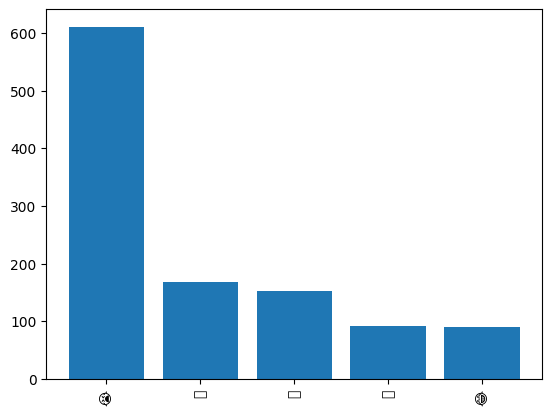

In [57]:
plt.bar(emoji_df[0].head(), emoji_df[1].head())
plt.xticks(rotation='vertical')
plt.show()

In [68]:
# Monthly timeline
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [59]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [60]:
timeline['time'] = time

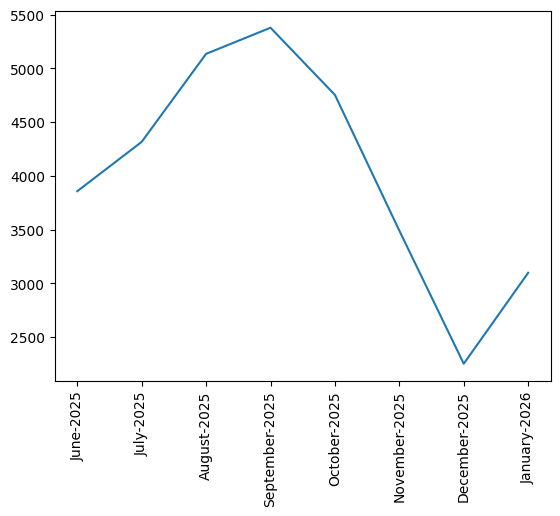

In [61]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
# Daily timeline
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

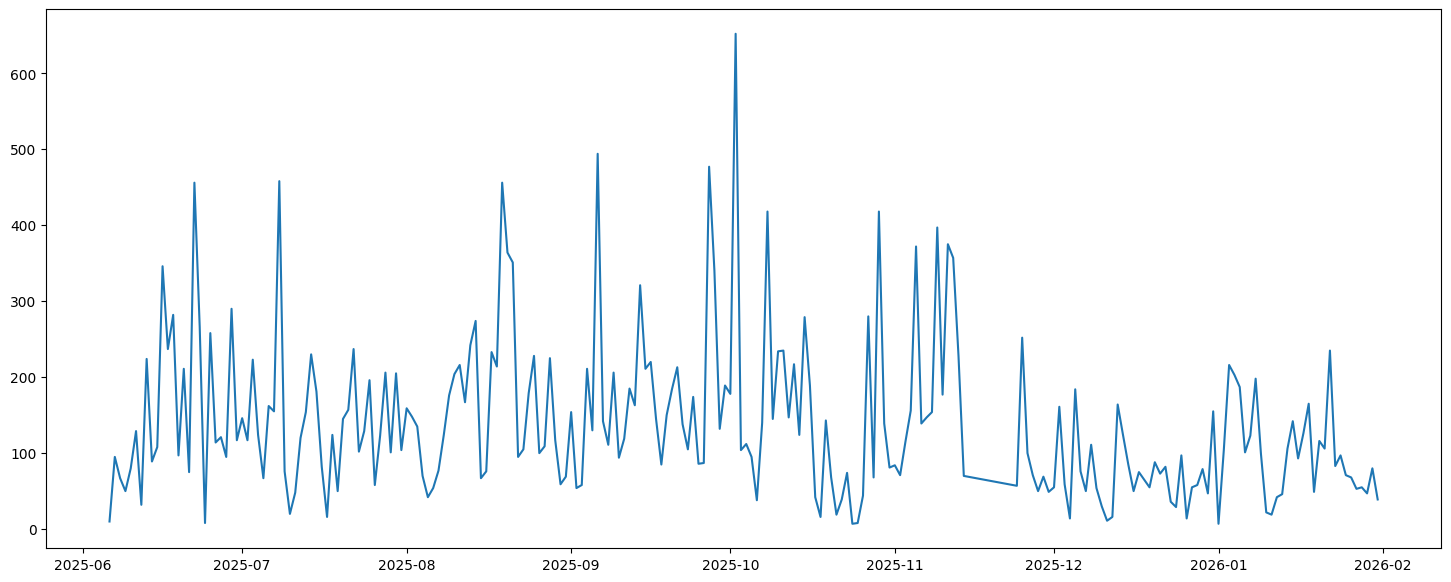

In [63]:
plt.figure(figsize=(18,7))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])
plt.show()

In [64]:
df['day_name'].value_counts()

day_name
Wednesday    5390
Sunday       5050
Tuesday      4785
Monday       4711
Thursday     4616
Saturday     4092
Friday       3635
Name: count, dtype: int64

In [65]:
# Activity heatmap
import seaborn as sns

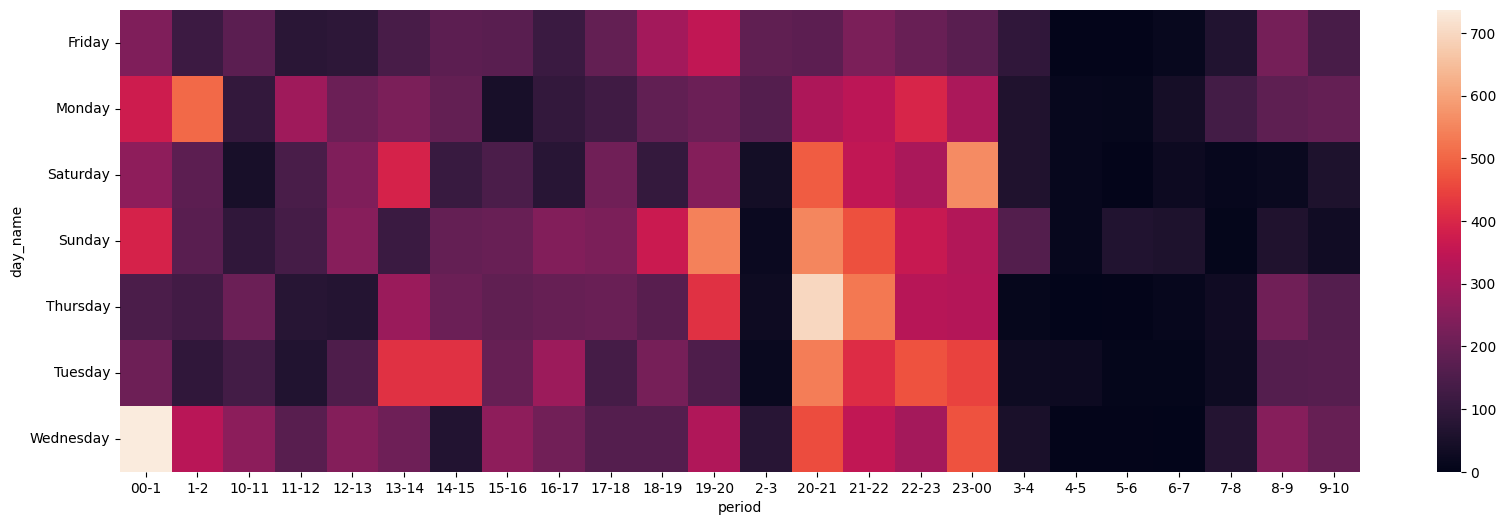

In [66]:
user_heatmap = df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)
plt.figure(figsize=(20,6))
sns.heatmap(user_heatmap)
plt.show()

# Deployed App link : https://wca-whatsapp-chat-analyzer.streamlit.app/

# Github Link: https://github.com/ChandanPanda30/whatsapp-chat-analyzer.git